In [40]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)
library(lsmeans)
library("lme4")
library('pbkrtest')

In [41]:
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")
## Need taxonomy and counts as matrices
## Need taxonomy and counts as matrices
euk_ASVs <- read.table("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/euk_asvs.txt",
                      stringsAsFactors = FALSE) %>% as.matrix() %>% as.list()

taxo_mat <- POR_taxo_4_analysis #%>%
  #rownames_to_column %>%
  #filter(rowname != c('ASV_2',"ASV_10673", 'ASV_10883')) %>%
  #column_to_rownames("rowname")
count_mat <- as.matrix(POR_counts_4_analysis)
count_mat <- as.matrix(POR_counts_4_analysis)

In [42]:
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

In [43]:
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27534 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27534 taxa by 7 taxonomic ranks ]

In [44]:
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [45]:
ps_fill= filter_taxa(ps_fill_euk, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
                     ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27459 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27459 taxa by 7 taxonomic ranks ]

In [46]:
sapply(as.data.frame(tax_table(ps_fill)), function(x) sum(is.na(x)))

domain  phylum   class   order  family   genus species 
   6352    9232   10010   14407   16244   20799   27459

In [47]:
microbiome::summarize_phyloseq(ps_fill)

Compositional = NO2

1] Min. number of reads = 4932] Max. number of reads = 2660213] Total number of reads = 185409174] Average number of reads = 51076.90633608825] Median number of reads = 388107] Sparsity = 0.9856729045668596] Any OTU sum to 1 or less? YES8] Number of singletons = 409] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)0.14567172875924110] Number of sample variables are: 55collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthdepthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 493"

[[2]]
[1] "2] Max. number of reads = 266021"

[[3]]
[1] "3] Total number of reads = 18540917"

[[4]]
[1] "4] Average number of reads = 51076.9063360882"

[[5]]
[1] "5] Median number of reads = 38810"

[[6]]
[1] "7] Sparsity = 0.985672904566859"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 40"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0.145671728759241"

[[10]]
[1] "10] Number of sample variables are: 55"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "depth"                 "Year.y"               
[49] "Month.y"               "Lat_decimal"           "Long_decimal"         
[52] "avgchla_mgm.3"         "sdchla_mgm.3"          "avgSST_degC"          
[55] "sdSST_degC"

In [48]:
(ps_fill_rare <- phyloseq::rarefy_even_depth(ps_fill, rngseed = 123, replace = FALSE, sample.size=2500))             

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

2 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


bagnumber-1759bagnumber-1896

...

11075OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 16384 taxa and 361 samples ]
sample_data() Sample Data:       [ 361 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 16384 taxa by 7 taxonomic ranks ]

In [49]:

adiv <- data.frame(
  "Shannon" = phyloseq::estimate_richness(ps_fill_rare, measures = "Shannon")) %>% rownames_to_column("sample_bag")
head(adiv)

,sample_bag,Shannon
,<chr>,<dbl>
1,bagnumber-1009,1.772885
2,bagnumber-1010,1.574296
3,bagnumber-1011,2.175282
4,bagnumber-1013,2.842471
5,bagnumber-1014,5.777263
6,bagnumber-1015,1.717165


In [50]:
#zscore
adiv_trans =adiv %>% 
  mutate(Shannon_trans = (Shannon - mean(Shannon))/sd(Shannon))
head(adiv_trans)

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,bagnumber-1009,1.772885,-0.8119260
2,bagnumber-1010,1.574296,-1.0155700
3,bagnumber-1011,2.175282,-0.3992853
4,bagnumber-1013,2.842471,0.2848869
5,bagnumber-1014,5.777263,3.2943850
6,bagnumber-1015,1.717165,-0.8690637


In [51]:
adiv_trans =adiv %>%
mutate(Shannon_trans = log10(Shannon))
head(adiv_trans)

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,bagnumber-1009,1.772885,0.2486805
2,bagnumber-1010,1.574296,0.1970863
3,bagnumber-1011,2.175282,0.3375156
4,bagnumber-1013,2.842471,0.4536960
5,bagnumber-1014,5.777263,0.7617221
6,bagnumber-1015,1.717165,0.2348121



	Shapiro-Wilk normality test

data:  adiv_trans$Shannon_trans
W = 0.98272, p-value = 0.0002542


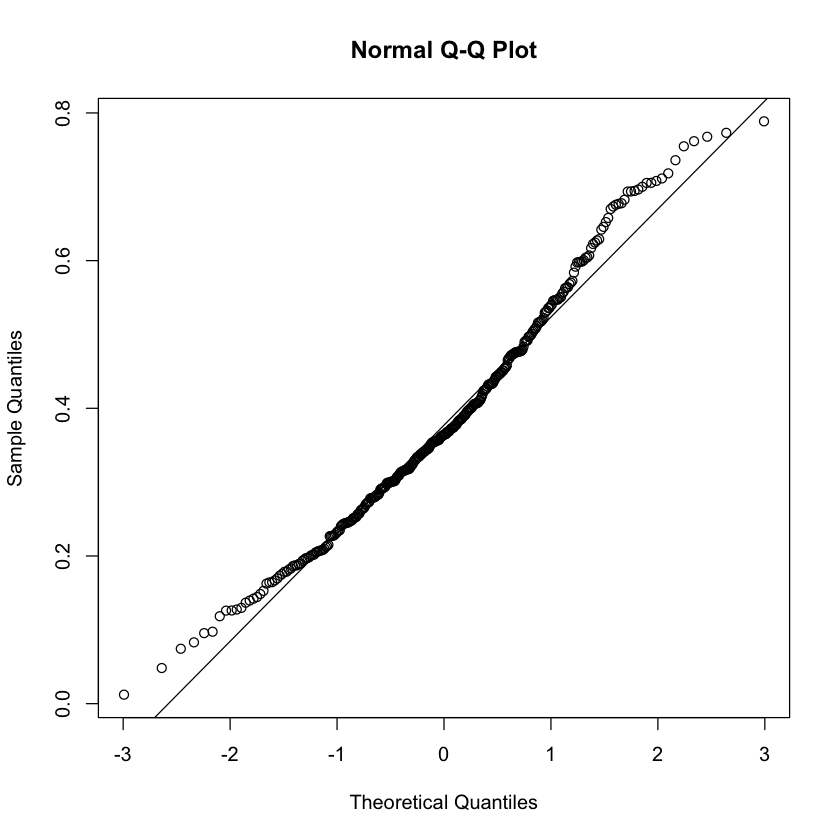

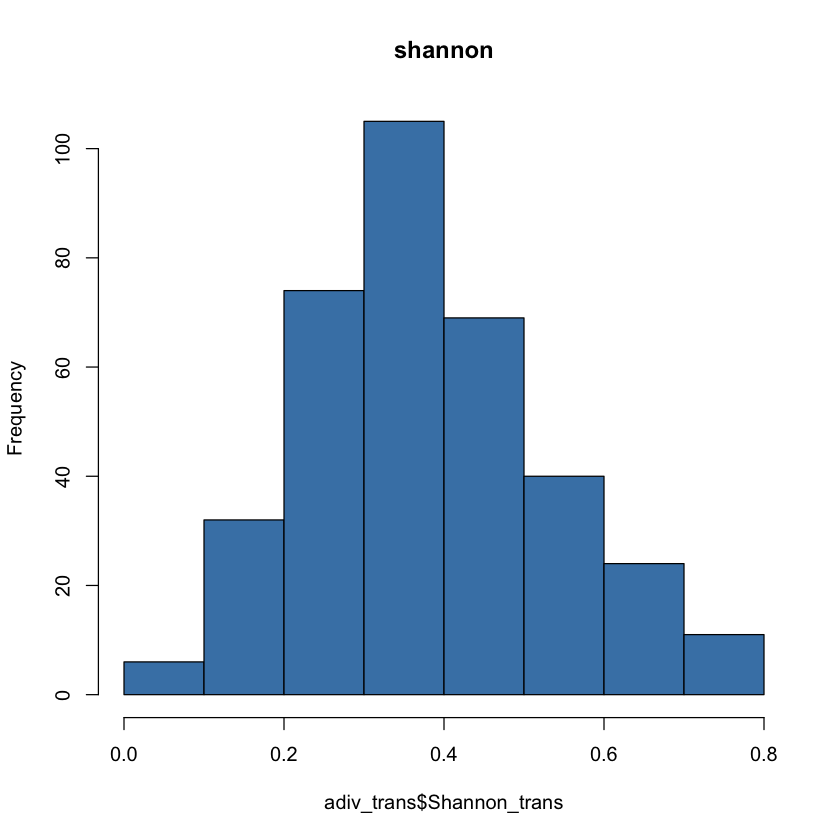

In [52]:
qqnorm(adiv_trans$Shannon_trans)
qqline(adiv_trans$Shannon_trans)
shapiro.test(adiv_trans$Shannon_trans)
hist(adiv_trans$Shannon_trans, col='steelblue', main='shannon')


	Shapiro-Wilk normality test

data:  adiv$Shannon
W = 0.89515, p-value = 4.751e-15


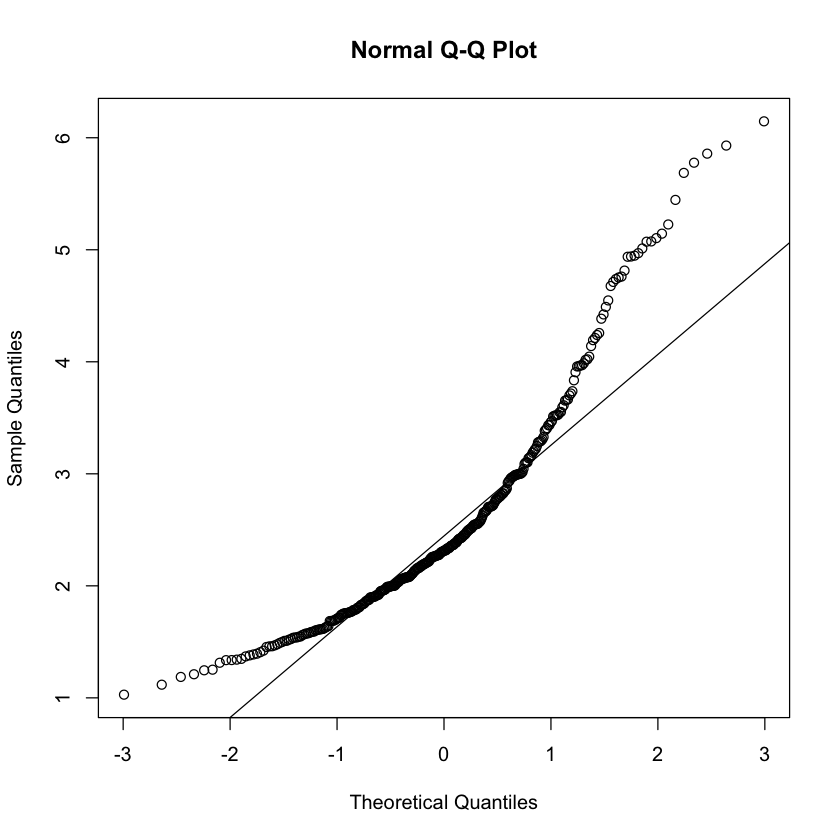

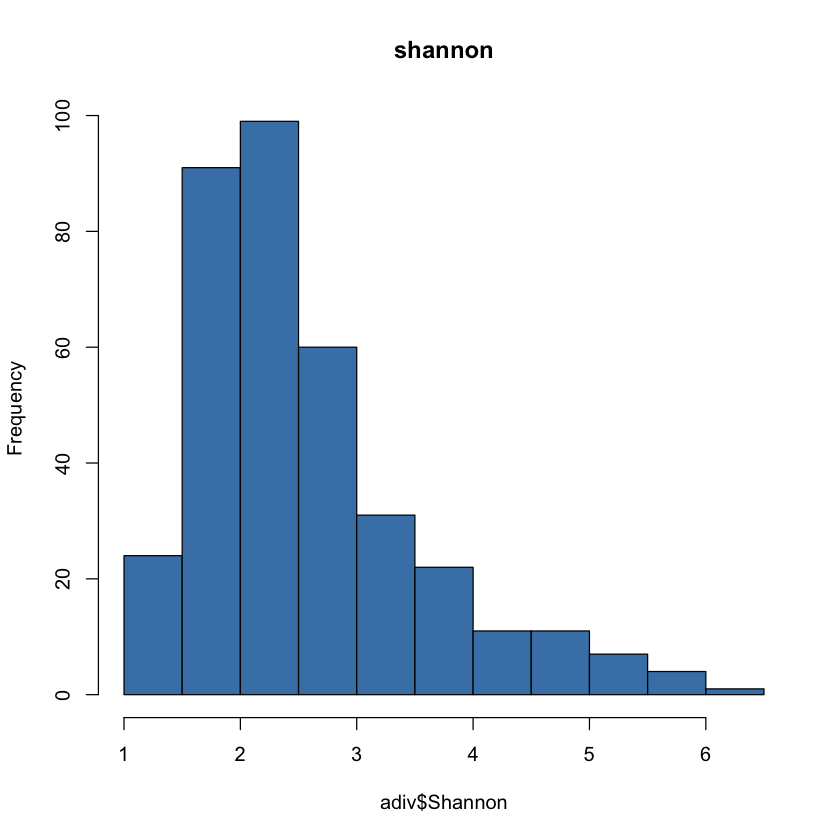

In [53]:
qqnorm(adiv$Shannon)
qqline(adiv$Shannon)
shapiro.test(adiv$Shannon)
hist(adiv$Shannon, col='steelblue', main='shannon')

In [54]:
ps_ra_meta= as(sample_data(ps_fill_rare), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "cluster_depth")

In [55]:
head(ps_ra_meta_envs)


,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,cluster_depth
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9
bagnumber-1010,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9
bagnumber-1011,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9
bagnumber-1013,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9
bagnumber-1014,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9
bagnumber-1015,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9


In [56]:
names(ps_ra_meta_envs[4:12])

[1] "Speed.cm.s."   "NO2.uM."       "N.N.uM."       "NO3.uM."      
[5] "PO4.uM."       "Si.uM."        "avgSST_degC"   "avgchla_mgm.3"
[9] "cluster_depth"

In [57]:
dim(adiv_trans)
head(adiv_trans)

[1] 361   3

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,bagnumber-1009,1.772885,0.2486805
2,bagnumber-1010,1.574296,0.1970863
3,bagnumber-1011,2.175282,0.3375156
4,bagnumber-1013,2.842471,0.4536960
5,bagnumber-1014,5.777263,0.7617221
6,bagnumber-1015,1.717165,0.2348121


In [58]:
#adiv_trans %>% left_join(ps_ra_meta_envs)
alpha_envs=cbind(ps_ra_meta_envs, adiv_trans)

In [59]:
head(alpha_envs)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,cluster_depth,sample_bag,Shannon,Shannon_trans
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
bagnumber-1009,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9,bagnumber-1009,1.772885,0.2486805
bagnumber-1010,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9,bagnumber-1010,1.574296,0.1970863
bagnumber-1011,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9,bagnumber-1011,2.175282,0.3375156
bagnumber-1013,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9,bagnumber-1013,2.842471,0.4536960
bagnumber-1014,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9,bagnumber-1014,5.777263,0.7617221
bagnumber-1015,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9,bagnumber-1015,1.717165,0.2348121


In [60]:
y_columns <- names(ps_ra_meta_envs[4:12])

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


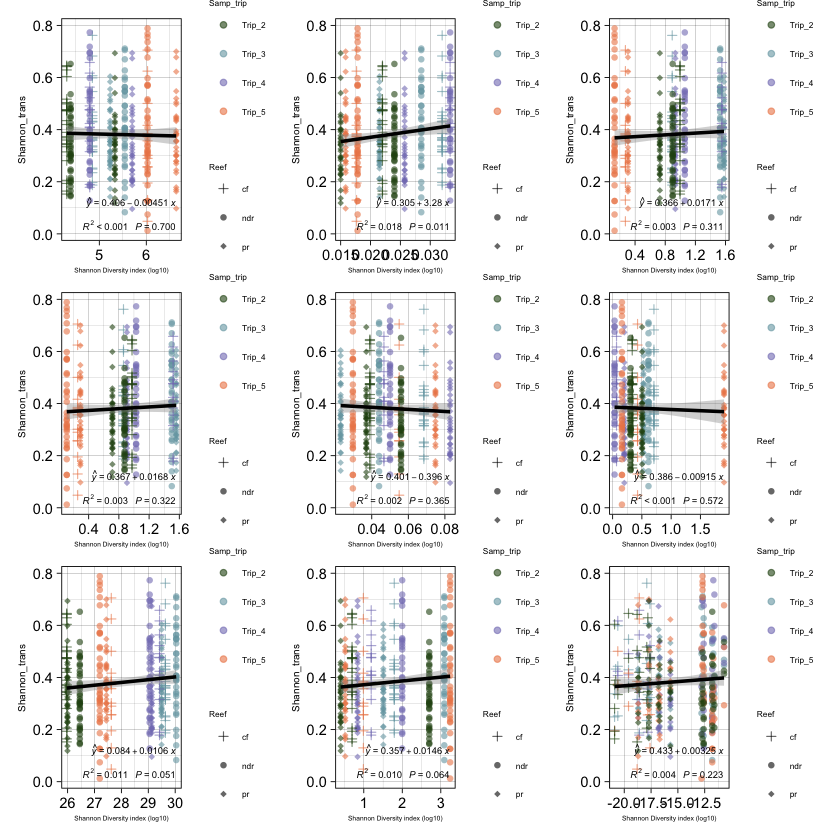

In [78]:
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- alpha_envs %>%
    ggplot(aes( x = .data[[y_var]], y = Shannon_trans, color = Samp_trip)) +
     geom_point(aes(color=Samp_trip, shape=reef) , alpha=.6) + 
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black") +


scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_linedraw() +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 6)) +
xlab("Shannon Diversity index (log10)")
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


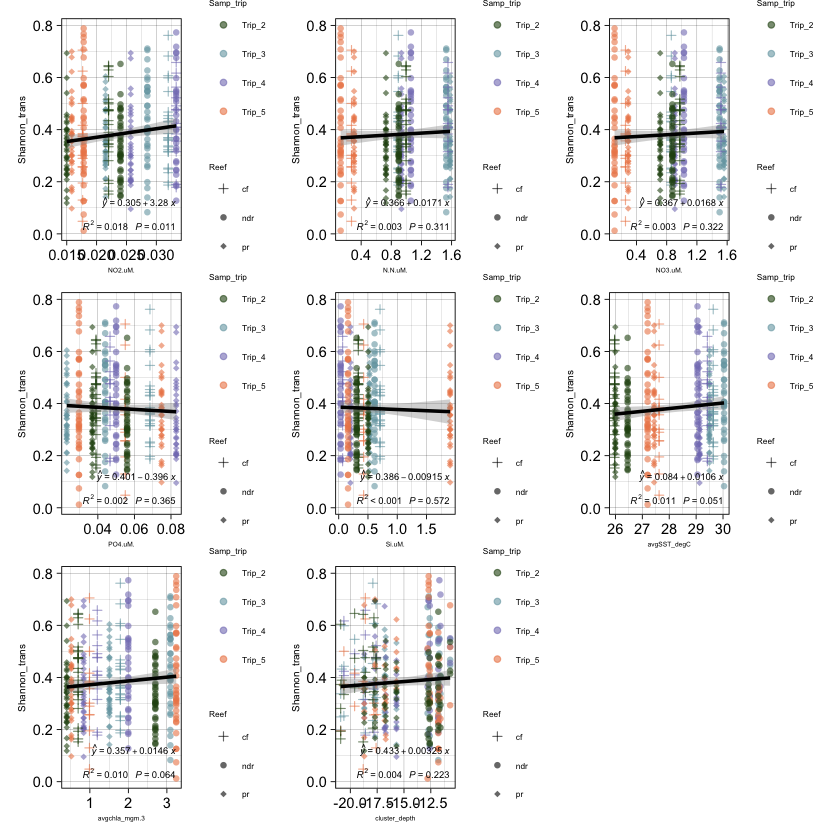

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


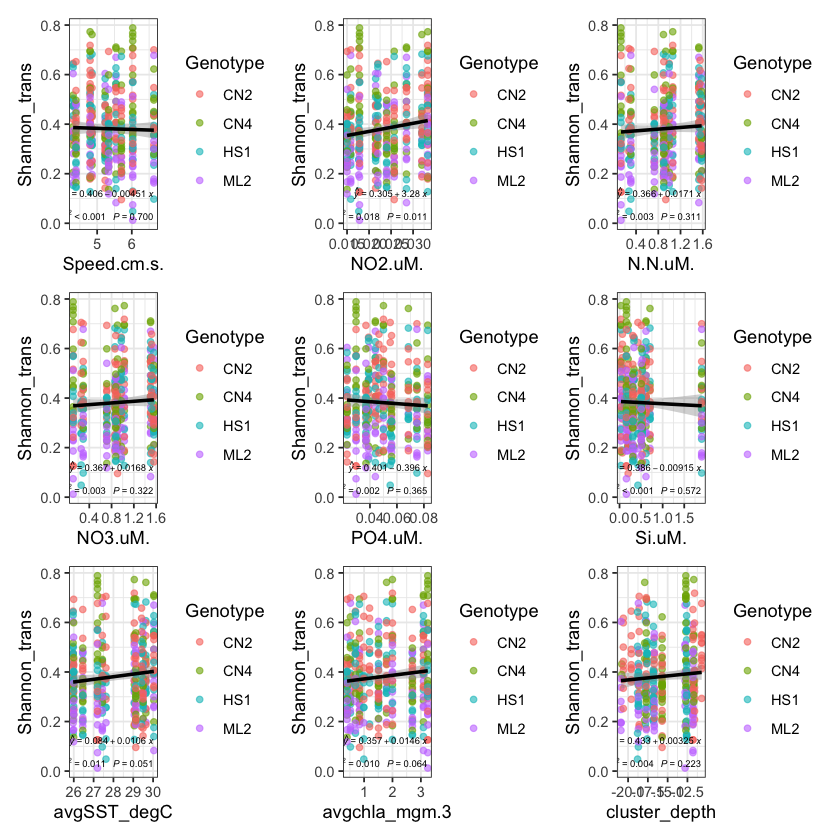

In [62]:
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- alpha_envs %>%
    ggplot(aes( x = .data[[y_var]], y = Shannon_trans, color = Genotype)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


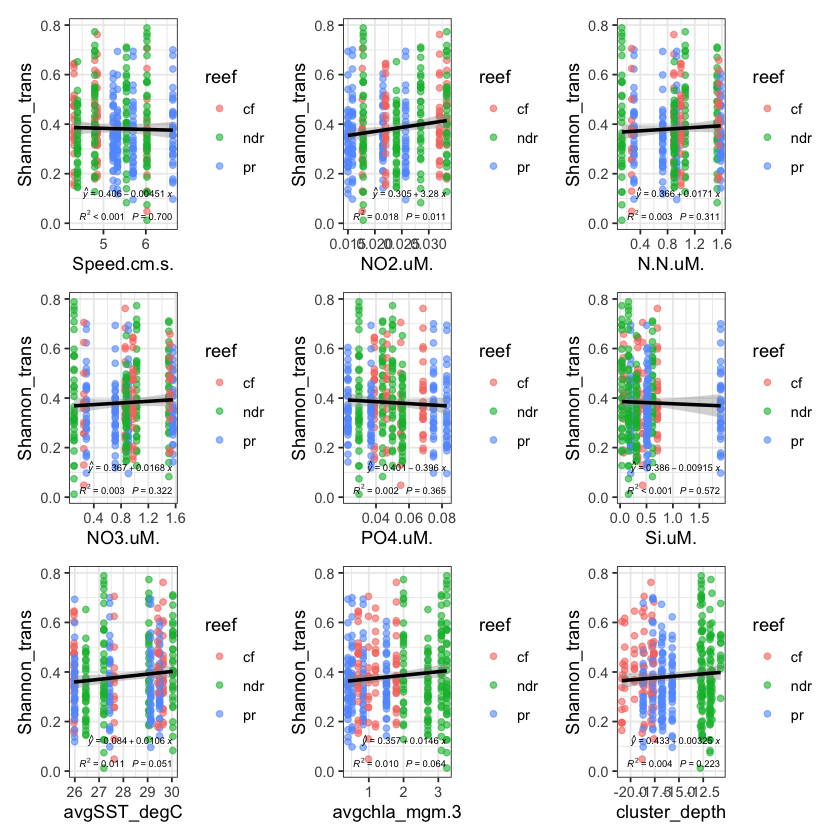

In [63]:
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- alpha_envs %>%
    ggplot(aes( x = .data[[y_var]], y = Shannon_trans, color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [64]:
head(ps_ra_meta)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,-20.9,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,-20.9,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
bagnumber-1011,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,June,⋯,-20.9,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
bagnumber-1013,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,June,⋯,-17.9,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
bagnumber-1014,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,June,⋯,-17.9,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
bagnumber-1015,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,June,⋯,-17.9,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026


In [65]:


alpha_all=cbind(ps_ra_meta, adiv_trans)
dim(alpha_all)

[1] 361  58

In [66]:
mixed.lmer_geno <- lmer(Shannon_trans ~ -1 + Genotype + (1|Fragment_number:Samp_trip:reef) , data =alpha_all)
summary(mixed.lmer_geno)

emmeans(mixed.lmer_geno, pairwise ~ -1 + Genotype, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon_trans ~ -1 + Genotype + (1 | Fragment_number:Samp_trip:reef)
   Data: alpha_all

REML criterion at convergence: -341.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1644 -0.6588 -0.1193  0.5755  2.4577 

Random effects:
 Groups                         Name        Variance  Std.Dev.
 Fragment_number:Samp_trip:reef (Intercept) 0.0002784 0.01669 
 Residual                                   0.0211284 0.14536 
Number of obs: 361, groups:  Fragment_number:Samp_trip:reef, 72

Fixed effects:
            Estimate Std. Error t value
GenotypeCN2  0.40575    0.01441   28.15
GenotypeCN4  0.43007    0.01657   25.96
GenotypeHS1  0.36701    0.01459   25.15
GenotypeML2  0.31692    0.01697   18.67

Correlation of Fixed Effects:
            GntCN2 GntCN4 GntHS1
GenotypeCN4 0.020               
GenotypeHS1 0.026  0.020        
GenotypeML2 0.018  0.017  0.019 

$emmeans
 Genotype emmean     SE  df lower.CL upper.CL
 CN2       0.406 0.0145 250    0.377    0.434
 CN4       0.430 0.0166 297    0.397    0.463
 HS1       0.367 0.0146 281    0.338    0.396
 ML2       0.317 0.0170 321    0.283    0.350

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast  estimate     SE  df t.ratio p.value
 CN2 - CN4  -0.0243 0.0218 350  -1.115  0.6808
 CN2 - HS1   0.0387 0.0203 325   1.912  0.2249
 CN2 - ML2   0.0888 0.0221 349   4.014  0.0004
 CN4 - HS1   0.0631 0.0219 345   2.877  0.0220
 CN4 - ML2   0.1131 0.0236 343   4.800  <.0001
 HS1 - ML2   0.0501 0.0222 338   2.255  0.1109

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 


In [67]:
mixed.lmer_geno <- lmer(Shannon_trans ~ -1 + reef + (1|Fragment_number:Genotype:Samp_trip) , data =alpha_all)
summary(mixed.lmer_geno)

emmeans(mixed.lmer_geno, pairwise ~ -1 + reef, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon_trans ~ -1 + reef + (1 | Fragment_number:Genotype:Samp_trip)
   Data: alpha_all

REML criterion at convergence: -330.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3427 -0.6484 -0.1096  0.6253  2.5764 

Random effects:
 Groups                             Name        Variance Std.Dev.
 Fragment_number:Genotype:Samp_trip (Intercept) 0.001367 0.03697 
 Residual                                       0.021155 0.14545 
Number of obs: 361, groups:  Fragment_number:Genotype:Samp_trip, 92

Fixed effects:
        Estimate Std. Error t value
reefcf   0.39619    0.01695   23.37
reefndr  0.39850    0.01315   30.31
reefpr   0.35383    0.01308   27.04

Correlation of Fixed Effects:
        reefcf refndr
reefndr 0.081        
reefpr  0.080  0.098 

$emmeans
 reef emmean     SE  df lower.CL upper.CL
 cf    0.396 0.0170 273    0.363    0.430
 ndr   0.398 0.0132 254    0.373    0.424
 pr    0.354 0.0131 245    0.328    0.380

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast estimate     SE  df t.ratio p.value
 cf - ndr -0.00231 0.0207 345  -0.112  0.9931
 cf - pr   0.04236 0.0206 348   2.052  0.1015
 ndr - pr  0.04467 0.0176 320   2.532  0.0317

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [68]:
mixed.lmer_geno <- lmer(Shannon_trans ~ -1 + Samp_trip + (1|Fragment_number:Genotype) , data =alpha_all)
summary(mixed.lmer_geno)

emmeans(mixed.lmer_geno, pairwise ~ -1 + Samp_trip, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon_trans ~ -1 + Samp_trip + (1 | Fragment_number:Genotype)
   Data: alpha_all

REML criterion at convergence: -326.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2670 -0.6715 -0.1335  0.6790  2.7780 

Random effects:
 Groups                   Name        Variance Std.Dev.
 Fragment_number:Genotype (Intercept) 0.001391 0.0373  
 Residual                             0.021440 0.1464  
Number of obs: 361, groups:  Fragment_number:Genotype, 25

Fixed effects:
                Estimate Std. Error t value
Samp_tripTrip_2  0.35480    0.01701   20.86
Samp_tripTrip_3  0.39336    0.01700   23.13
Samp_tripTrip_4  0.39083    0.01871   20.89
Samp_tripTrip_5  0.38041    0.01771   21.49

Correlation of Fixed Effects:
            Sm_T_2 Sm_T_3 Sm_T_4
Smp_trpTr_3 0.239               
Smp_trpTr_4 0.220  0.225        
Smp_trpTr_5 0.224  0.228  0.211 

$emmeans
 Samp_trip emmean     SE    df lower.CL upper.CL
 Trip_2     0.355 0.0171  94.4    0.321    0.389
 Trip_3     0.393 0.0171  90.8    0.359    0.427
 Trip_4     0.391 0.0188 116.8    0.354    0.428
 Trip_5     0.380 0.0178 108.2    0.345    0.416

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast        estimate     SE  df t.ratio p.value
 Trip_2 - Trip_3 -0.03857 0.0210 338  -1.837  0.2577
 Trip_2 - Trip_4 -0.03603 0.0224 341  -1.611  0.3737
 Trip_2 - Trip_5 -0.02561 0.0216 342  -1.183  0.6378
 Trip_3 - Trip_4  0.00254 0.0223 340   0.114  0.9995
 Trip_3 - Trip_5  0.01296 0.0216 341   0.601  0.9318
 Trip_4 - Trip_5  0.01042 0.0229 344   0.455  0.9687

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 


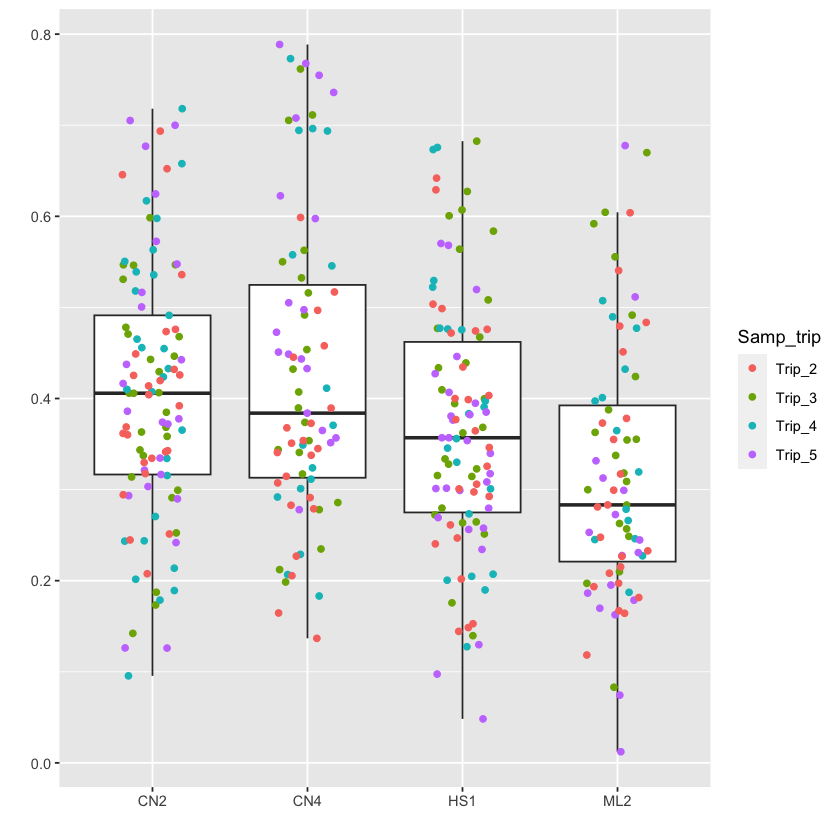

In [69]:
alpha_all %>%
 ggplot(aes(x = Genotype, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
  labs(x = "", y = "")

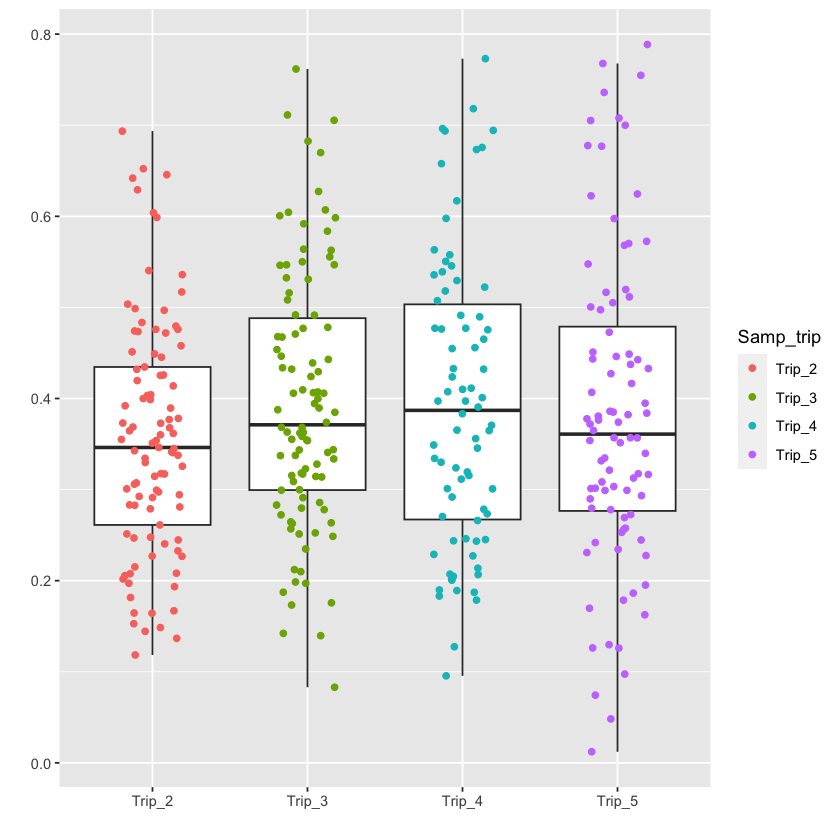

In [70]:
alpha_all %>%
 ggplot(aes(x = Samp_trip, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
  labs(x = "", y = "")

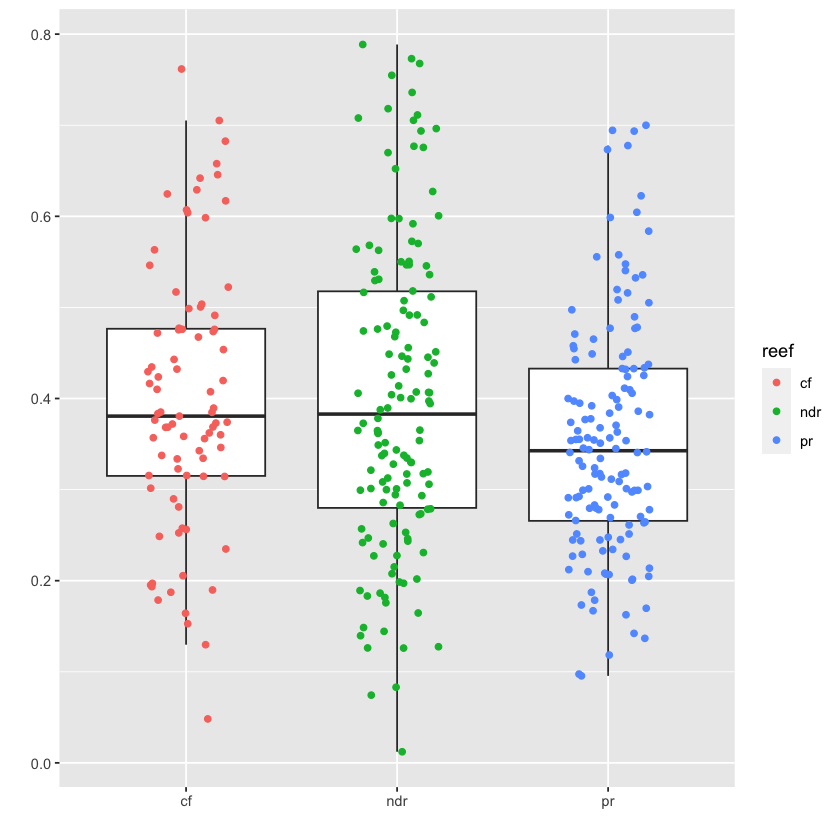

In [71]:
alpha_all %>%
 ggplot(aes(x = reef, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = reef), height = 0, width = .2) +
  labs(x = "", y = "")

In [72]:
mixed.lmer_interaction <- lmer(Shannon_trans ~ -1 + Genotype:reef + (1|Fragment_number:reef), data = alpha_all)
summary(mixed.lmer_interaction)
emmeans(mixed.lmer_interaction, pairwise ~ -1 + Genotype:reef, adjust = "tukey")

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Shannon_trans ~ -1 + Genotype:reef + (1 | Fragment_number:reef)
   Data: alpha_all

REML criterion at convergence: -319.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3522 -0.6340 -0.1258  0.6005  2.4894 

Random effects:
 Groups               Name        Variance Std.Dev.
 Fragment_number:reef (Intercept) 0.00000  0.0000  
 Residual                         0.02094  0.1447  
Number of obs: 361, groups:  Fragment_number:reef, 19

Fixed effects:
                    Estimate Std. Error t value
GenotypeCN2:reefcf   0.43444    0.02519  17.246
GenotypeCN4:reefcf   0.41362    0.05116   8.084
GenotypeHS1:reefcf   0.38864    0.02519  15.428
GenotypeML2:reefcf   0.28822    0.04824   5.975
GenotypeCN2:reefndr  0.41788    0.02412  17.326
GenotypeCN4:reefndr  0.48620    0.02446  19.877
GenotypeHS1:reefndr  0.36717    0.02599  14.127
GenotypeML2:reefndr  0.32399    0.02412  13.433
GenotypeCN2:reefpr   0.36787    0.02412  15.253
G

$emmeans
 Genotype reef emmean     SE    df lower.CL upper.CL
 CN2      cf    0.434 0.0255  52.6    0.383    0.486
 CN4      cf    0.414 0.0512 323.5    0.313    0.514
 HS1      cf    0.389 0.0253  95.3    0.338    0.439
 ML2      cf    0.288 0.0485 298.9    0.193    0.384
 CN2      ndr   0.418 0.0244  83.6    0.369    0.466
 CN4      ndr   0.486 0.0248  80.2    0.437    0.536
 HS1      ndr   0.367 0.0263 100.8    0.315    0.419
 ML2      ndr   0.324 0.0242 119.7    0.276    0.372
 CN2      pr    0.368 0.0246  69.8    0.319    0.417
 CN4      pr    0.378 0.0244 100.2    0.330    0.426
 HS1      pr    0.348 0.0238  75.9    0.300    0.395
 ML2      pr    0.317 0.0267 124.5    0.265    0.370

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast           estimate     SE    df t.ratio p.value
 CN2 cf - CN4 cf    0.020817 0.0571 348.0   0.365  1.0000
 CN2 cf - HS1 cf    0.045802 0.0357 349.0   1.283  0.9808
 CN2 cf - ML2 cf    0.146214 0.0546 347.2   

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


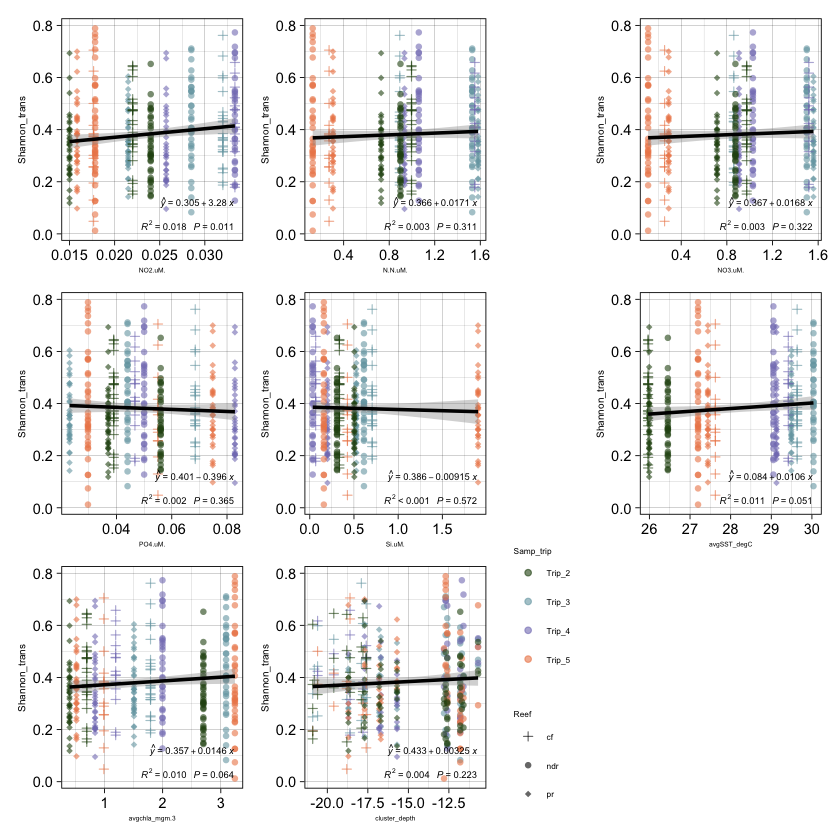

In [81]:
# Create an empty list to store the plots
plots <- list()

# Create a shared plot with geom_smooth and geom_point
shared_plot <- alpha_envs %>%
  ggplot(aes(x = .data[[y_columns[1]]], y = Shannon_trans, color = Samp_trip)) +
  geom_point(aes(color = Samp_trip, shape = reef), alpha = .6) +
  theme_bw() +
  geom_smooth(method = 'lm', color = 'black') +
  stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
    parse = TRUE,
    label.y = "bottom",
    label.x = "right",
    color = "black",
    rr.digits = 3,
    size = 2
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")),
    label.y = 0.15,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    size = 2,
    label.x = "right",
    color = "black"
  ) +
  scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
  scale_color_manual(values = c("#274e13", "#76a5af", "#837dbe", "#ed8655")) +
  theme_linedraw() +
  theme(legend.text = element_text(size = 5)) +
  theme(legend.title = element_text(size = 5)) +
  theme(axis.title.x = element_text(size = 4)) +
  theme(axis.title.y = element_text(size = 6)) +
  xlab("Shannon Diversity index (log10)") +
  theme(legend.position = "none")  # Remove legend for the shared plot

# Loop through each y variable (starting from the second one) and create a plot
for (y_var in y_columns[-1]) {
  plot <- shared_plot +
    aes(x = .data[[y_var]])  # Modify the x-axis variable
  # Remove legend for individual plots
  plot <- plot + theme(legend.position = "none")
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Add the legend to the combined plot
combined_plot <- combined_plot + theme(legend.position = "right")

# Print the combined plot
print(combined_plot)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


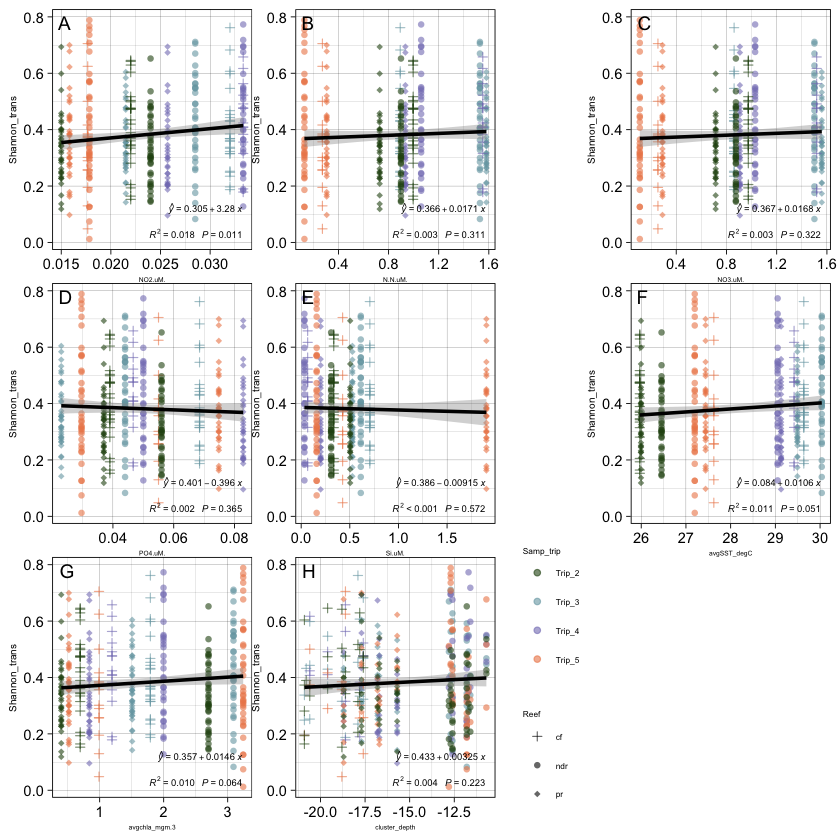

In [85]:
library(ggplot2)
library(ggpubr)

# Create an empty list to store the plots
plots <- list()

# Create a shared plot with geom_smooth and geom_point
shared_plot <- alpha_envs %>%
  ggplot(aes(x = .data[[y_columns[1]]], y = Shannon_trans, color = Samp_trip)) +
  geom_point(aes(color = Samp_trip, shape = reef), alpha = .6) +
  theme_bw() +
  geom_smooth(method = 'lm', color = 'black') +
  stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
    parse = TRUE,
    label.y = "bottom",
    label.x = "right",
    color = "black",
    rr.digits = 3,
    size = 2
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")),
    label.y = 0.15,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    size = 2,
    label.x = "right",
    color = "black"
  ) +
  scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
  scale_color_manual(values = c("#274e13", "#76a5af", "#837dbe", "#ed8655")) +
  theme_linedraw() +
  theme(legend.text = element_text(size = 5)) +
  theme(legend.title = element_text(size = 5)) +
  theme(axis.title.x = element_text(size = 4)) +
  theme(axis.title.y = element_text(size = 6)) +
  xlab("Shannon Diversity index (log10)") +
  theme(legend.position = "none")  # Remove legend for the shared plot

# Loop through each y variable (starting from the second one) and create a plot
for (i in 1:length(y_columns[-1])) {
  y_var <- y_columns[-1][i]
  label <- LETTERS[i]  # A. for the first plot, B. for the second, and so on
  
  plot <- shared_plot +
    aes(x = .data[[y_var]]) +  # Modify the x-axis variable
    annotate("text", x = -Inf, y = Inf, label = label, vjust = 1.5, hjust = -0.5, size = 4) +
    theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Reduce plot margin to avoid clipping
  
  # Remove legend for individual plots
  plot <- plot + theme(legend.position = "none")
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Add the legend to the combined plot
combined_plot <- combined_plot + theme(legend.position = "right")

# Print the combined plot
print(combined_plot)
